In [5]:
import os
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [6]:
def split_document(text, max_length=250, overlap=50):
    # Split text into words
    words = text.split()
    parts = []
    if len(words) <= max_length:
        return [text]  # Return the entire text if it's short enough

    i = 0
    while i < len(words):
        # Ensure that we don't exceed the text length
        end_index = min(i + max_length, len(words))
        # Join the selected range of words back into a string
        chunk_text = " ".join(words[i:end_index])
        parts.append(chunk_text)
        i += (max_length - overlap)
    
    return parts

In [7]:
def load_data(directory_paths):
    texts, labels = [], []
    for dialect, directory in directory_paths.items():
        for filename in os.listdir(directory):
            filepath = os.path.join(directory, filename)
            with open(filepath, 'r', encoding='latin-1') as file:
                text = file.read().strip()
                text = re.sub(r'\d+', '', text)  # Remove numbers
                
                # Apply chunking
                chunks = split_document(text)
                i = 0
                for chunk in chunks:
                    if i >= 40: 
                        break # doing this because the dataset is really uneven right now, so it is always classifying as like 2 dialects
                    texts.append(chunk)
                    labels.append(dialect)  # Each chunk gets the same label as the original document
                    i+=1

    return texts, labels


def preprocess_texts(texts):
    # Define a tokenizer function
    def tokenize(text):
        # Simple tokenization based on whitespace
        return text.split()

    # Initialize a TF-IDF Vectorizer without using stop words
    vectorizer = TfidfVectorizer(tokenizer=tokenize)
    features = vectorizer.fit_transform(texts)
    return features, vectorizer



def train_model(features, labels):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
    model = MultinomialNB()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))





In [8]:
# no bibles version

# directory_paths_no_bibles = {
#     # 'other': '../language_resources/dialects_no_bible/other_quechua/',
#     'quh': '../language_resources/dialects_no_bible/quh',
#     'quk': '../language_resources/dialects_no_bible/quk',
#     'qux': '../language_resources/dialects_no_bible/qux',
#     'quy': '../language_resources/dialects_no_bible/quy',
#     'quz': '../language_resources/dialects_no_bible/quz', 
#     'qwh': '../language_resources/dialects_no_bible/qwh',
#     'qxo': '../language_resources/dialects_no_bible/qxo'
#     # 'southern': '../language_resources/dialects_no_bible/southern_quechua'
# }

# no bible data, only other and augmented data
directory_paths_no_bibles = {
    'inb': '../language_resources/no_bible_all_data_jan2025/inb',
    'qub': '../language_resources/no_bible_all_data_jan2025/qub',
    'quh': '../language_resources/no_bible_all_data_jan2025/quh',
    'quk': '../language_resources/no_bible_all_data_jan2025/quk',
    'qux': '../language_resources/no_bible_all_data_jan2025/qux',
    'quy': '../language_resources/no_bible_all_data_jan2025/quy',
    'quz': '../language_resources/no_bible_all_data_jan2025/quz', 
    'qwh': '../language_resources/no_bible_all_data_jan2025/qwh',
    'qxo': '../language_resources/no_bible_all_data_jan2025/qxo'
}

texts, labels = load_data(directory_paths_no_bibles)
features, vectorizer = preprocess_texts(texts)

/Users/clairepost/opt/anaconda3/envs/nlp_hw/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [9]:
print(f"Loaded {len(texts)} texts and {len(labels)} labels.")
print(f"Features shape: {features.shape}")
print(f"Number of labels: {len(labels)}")

Loaded 2292 texts and 2292 labels.
Features shape: (2292, 114494)
Number of labels: 2292


In [10]:
train_model(features, labels)

Accuracy: 0.7777777777777778
Classification Report:
               precision    recall  f1-score   support

         qub       0.00      0.00      0.00         2
         quh       0.99      0.75      0.85       136
         quk       0.00      0.00      0.00         6
         qux       0.90      0.72      0.80        65
         quy       0.00      0.00      0.00        15
         quz       0.68      1.00      0.81       208
         qwh       0.00      0.00      0.00        14
         qxo       0.00      0.00      0.00        13

    accuracy                           0.78       459
   macro avg       0.32      0.31      0.31       459
weighted avg       0.73      0.78      0.73       459



/Users/clairepost/opt/anaconda3/envs/nlp_hw/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/clairepost/opt/anaconda3/envs/nlp_hw/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/clairepost/opt/anaconda3/envs/nlp_hw/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Accuracy: 0.7777777777777778
Classification Report:
               precision    recall  f1-score   support

         qub       0.00      0.00      0.00         2
         quh       0.99      0.75      0.85       136
         quk       0.00      0.00      0.00         6
         qux       0.90      0.72      0.80        65
         quy       0.00      0.00      0.00        15
         quz       0.68      1.00      0.81       208
         qwh       0.00      0.00      0.00        14
         qxo       0.00      0.00      0.00        13

    accuracy                           0.78       459
   macro avg       0.32      0.31      0.31       459
weighted avg       0.73      0.78      0.73       459

Precision: 0.7314714621441606
Recall: 0.7777777777777778
F1 Score: 0.7348712510470379


/Users/clairepost/opt/anaconda3/envs/nlp_hw/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/clairepost/opt/anaconda3/envs/nlp_hw/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/clairepost/opt/anaconda3/envs/nlp_hw/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<Figure size 1000x1000 with 0 Axes>

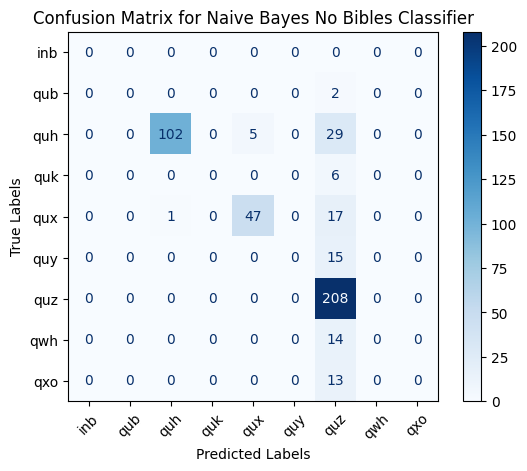

In [11]:
def train_model(features, labels):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
    model = MultinomialNB()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))

        # Calculate precision, recall, F1 score, and support
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, preds, average='weighted')
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)

    # Compute and plot confusion matrix
    cm = confusion_matrix(y_test, preds, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    plt.figure(figsize=(10, 10))
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix for Naive Bayes No Bibles Classifier')
    plt.xticks(rotation=45)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

train_model(features,labels)

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

# Assume 'texts' and 'labels' are loaded and preprocessed
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)
y = labels

model = MultinomialNB()
scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print("Accuracy scores for each fold:", scores)
print("Mean cross-validation accuracy:", scores.mean())


Accuracy scores for each fold: [0.71895425 0.81917211 0.72052402 0.63755459 0.77510917]
Mean cross-validation accuracy: 0.7342628269163074


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

# Assume 'texts' and 'labels' are loaded and prepared
vectorizer = TfidfVectorizer()
model = MultinomialNB()

# Create a pipeline
pipeline = make_pipeline(vectorizer, model)

# Perform cross-validation
cv_scores = cross_val_score(pipeline, texts, labels, cv=5, scoring='accuracy')
print("CV Scores:", cv_scores)

CV Scores: [0.72766885 0.81917211 0.72052402 0.63755459 0.77729258]


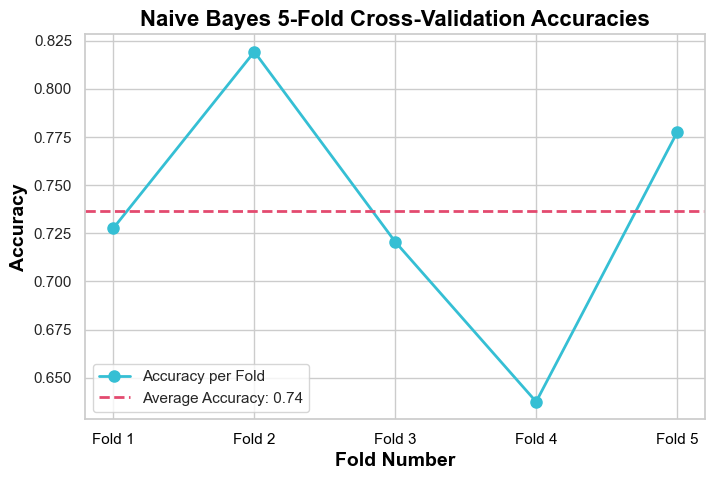

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns  # for a nicer styling

def plot_cv_scores(cv_scores):
    # Set the seaborn style for better aesthetics
    sns.set(style="whitegrid")

    fig, ax = plt.subplots(figsize=(8, 5))  # Bigger size for better readability
    ax.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', color='#35BFD4', markersize=8, linewidth=2, label='Accuracy per Fold')
    
    # Adding average line
    avg_score = sum(cv_scores) / len(cv_scores)
    ax.axhline(y=avg_score, color='#E34A6F', linestyle='--', linewidth=2, label=f'Average Accuracy: {avg_score:.2f}')

    # Titles and labels
    ax.set_title('Naive Bayes 5-Fold Cross-Validation Accuracies', fontsize=16, fontweight='bold', color='black')
    ax.set_xlabel('Fold Number', fontsize=14, fontweight='bold', color='black')
    ax.set_ylabel('Accuracy', fontsize=14, fontweight='bold', color='black')
    ax.set_xticks(range(1, len(cv_scores) + 1))
    ax.set_xticklabels([f"Fold {i}" for i in range(1, len(cv_scores) + 1)], color='black')

    # Adding a legend
    ax.legend(loc='lower left')

    plt.show()

plot_cv_scores(cv_scores)


In [15]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt


report = classification_report(true_labels, predictions, target_names=directory_paths_no_bibles.keys(), output_dict=True)
report_df = pd.DataFrame(report).transpose()

report_df.drop(['accuracy', 'macro avg', 'weighted avg'], inplace=True)  # Drop averages/total
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(12, 6))
plt.title('Classification Report for Each Class')
plt.ylabel('Score')
plt.show()


NameError: name 'true_labels' is not defined